<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/CompareImputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install missingpy
!pip install scikit-learn==1.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.2 which is incompatible.


In [2]:
import sklearn
print(sklearn.__version__)

1.1.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**RawData**

In [4]:
import pandas as pd
widetable = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable.xlsx')
widetable = widetable.iloc[:, 1:]
widetable.head()

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen
0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,30,...,NaN,NaN,7.2,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,0,...,480.0,NaN,NaN,202.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,0,...,442.0,NaN,NaN,157.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,0,...,NaN,133.0,6.9,201.0,177.0,147.0,30.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,0,...,253.0,97.0,NaN,NaN,NaN,NaN,NaN,17.0,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


**dummy**

In [5]:
widetable['Sex'] = widetable['Sex'].replace({'ชาย': 0, 'หญิง': 1})

In [6]:
nationality_map = {'ไทย': 0}

caucasian = ['บริติช  (อังกฤษ, สก็อตแลนด์)', 'อเมริกัน', 'เยอรมัน', 'โอมาน', 'ออสเตรเลีย', 'แคนาดา',
             'อิตาลี', 'สวิส', 'ซีเรีย', 'เดนมาร์ก', 'นอร์เวย์', 'ดัตช์', 'สเปน', 'เบลเยียม', 'ไอซ์แลนด์',
             'ฝรั่งเศส', 'เซนต์คิตส์และเนวิส', 'สวีเดน', 'ออสเตรีย', 'ไซปรัส']
asian = ['ลาว','จีน','เวียดนาม','เขมรอพยพ','ไทยลื้อ','ญี่ปุ่น', 'จีน(ไต้หวัน)']
other = ['ไม่ระบุ','อื่นๆ','ไร้สัญชาติ']

for nationality in asian:
    nationality_map[nationality] = 1

for nationality in caucasian:
    nationality_map[nationality] = 2

for nationality in other:
    nationality_map[nationality] = 3

widetable['NATNL'] = widetable['NATNL'].replace(nationality_map)

In [7]:
import numpy as np

In [8]:
widetable['LabLocation'] = np.where(widetable['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)

In [9]:
df_no_missing = widetable.dropna()
df_no_missing.head()

,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,...,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation,LabCwhen
131,2291888,15.35,3.4,2561-01-03 10:23:12.210,3434247,-2.561404,0,18,0,0,...,238.0,110.0,7.2,258.0,113.0,209.0,40.0,747.0,1,2559-09-02 07:34:38.390
364,1944785,2.07,33.8,2561-05-10 09:51:52.050,3671352,-25.247409,0,0,0,0,...,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0,2559-11-22 12:38:47.920
1270,811906,1.72,36.2,2562-03-25 10:01:27.753,4416087,-15.404570,0,0,0,0,...,289.0,75.0,5.8,168.0,106.0,114.0,34.0,258.0,1,2560-08-21 10:53:29.757
1562,1261164,1.71,28.9,2562-05-30 15:10:43.277,3579795,-4.255777,0,0,0,0,...,169.0,289.0,7.0,128.0,104.0,59.0,44.0,57.8,0,2559-10-21 08:31:00.233
1940,890452,1.48,43.4,2562-08-23 09:42:24.053,3411444,-9.459862,0,70,0,1,...,196.0,88.0,6.6,128.0,94.0,60.0,52.0,132.4,1,2559-10-14 18:59:15.893


In [10]:
remove = ['Slopes', 'PatientUID', 'PatientVisitUID','InPatient', 'OutPatient', 'Emergency','Recent_Date', 'VisitLocation', 'StartDTTM','EndDttm', 'LabCwhen']
no_missing = df_no_missing.drop(columns=remove)
no_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
131,15.35,3.4,0,18,0,0,0,0,0,0,...,8.50,238.0,110.0,7.2,258.0,113.0,209.0,40.0,747.0,1
364,2.07,33.8,0,0,0,0,0,0,0,20,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0
1270,1.72,36.2,0,0,0,0,0,0,0,63,...,8.05,289.0,75.0,5.8,168.0,106.0,114.0,34.0,258.0,1
1562,1.71,28.9,0,0,0,0,0,0,0,0,...,4.42,169.0,289.0,7.0,128.0,104.0,59.0,44.0,57.8,0
1940,1.48,43.4,0,70,0,1,0,0,0,0,...,6.20,196.0,88.0,6.6,128.0,94.0,60.0,52.0,132.4,1


In [11]:
columns_with_null  = no_missing.isnull().any()
if columns_with_null.any():
    print("There are columns with null values.")
else:
    print("No columns have null values.")

No columns have null values.


**สุ่มค่าว่างในข้อมูล**

In [12]:
import numpy as np
np.random.seed(42)
rows, cols = no_missing.shape
missing_fraction = 0.2
mask = np.random.rand(rows, cols) < missing_fraction
df_with_missing = no_missing.mask(mask)

df_with_missing.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
131,15.35,3.4,0.0,18.0,NaN,NaN,NaN,0.0,0.0,0.0,...,8.50,238.0,110.0,7.2,NaN,113.0,NaN,40.0,747.0,NaN
364,NaN,33.8,0.0,0.0,0.0,NaN,0.0,NaN,0.0,20.0,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
1270,1.72,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,63.0,...,NaN,289.0,NaN,NaN,168.0,106.0,114.0,34.0,258.0,1.0
1562,1.71,28.9,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,4.42,169.0,289.0,7.0,128.0,NaN,59.0,NaN,57.8,0.0
1940,1.48,43.4,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,...,6.20,196.0,88.0,NaN,NaN,94.0,NaN,52.0,132.4,1.0


In [13]:
df_with_missing.isnull().sum()

Recent_Creatinine            25
Recent_eGFR                  32
G1M2:ARB                     39
G3M1:Statin                  29
G5M2:NSAIDs                  28
                             ..
L22:Triglyceride             35
L23:LDL Cholesterol          34
L24:HDL Cholesterol          20
L28:UrineProtein/Cr ratio    27
LabLocation                  30
Length: 72, dtype: int64

**MICE**

In [14]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
imputer = IterativeImputer(random_state=0, initial_strategy='median')
data_mice = df_with_missing.copy()
data_mice_filled = imputer.fit_transform(data_mice)
Mice = pd.DataFrame(data_mice_filled, columns = data_mice.columns).round(1)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:
Mice.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.4,3.4,0.0,18.0,0.3,4.0,13.7,0.0,0.0,0.0,...,8.5,238.0,110.0,7.2,205.1,113.0,150.0,40.0,747.0,0.5
1,3.0,33.8,0.0,0.0,0.0,0.5,0.0,4.3,0.0,20.0,...,8.4,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
2,1.7,41.6,0.0,0.0,0.2,0.0,0.0,0.0,-0.1,63.0,...,7.5,289.0,129.7,7.7,168.0,106.0,114.0,34.0,258.0,1.0
3,1.7,28.9,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,...,4.4,169.0,289.0,7.0,128.0,169.5,59.0,49.4,57.8,0.0
4,1.5,43.4,12.1,60.6,0.0,1.0,33.4,0.0,0.0,0.0,...,6.2,196.0,88.0,5.7,163.1,94.0,81.5,52.0,132.4,1.0


**MissForest**

In [17]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [18]:
imputer = MissForest()
data_missfr = df_with_missing.copy()
data_missfr_filled = imputer.fit_transform(data_missfr)
MissForest = pd.DataFrame(data_missfr_filled, columns = data_missfr.columns).round(1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 4


In [19]:
MissForest.head()

,Recent_Creatinine,Recent_eGFR,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,15.4,3.4,0.0,18.0,0.0,11.1,8.0,0.0,0.0,0.0,...,8.5,238.0,110.0,7.2,148.8,113.0,89.8,40.0,747.0,0.6
1,1.9,33.8,0.0,0.0,0.0,0.0,0.0,16.6,0.0,20.0,...,8.4,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
2,1.7,34.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,63.0,...,8.3,289.0,143.0,7.7,168.0,106.0,114.0,34.0,258.0,1.0
3,1.7,28.9,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,...,4.4,169.0,289.0,7.0,128.0,131.4,59.0,38.8,57.8,0.0
4,1.5,43.4,1.5,26.4,0.0,1.0,41.6,0.0,0.0,0.0,...,6.2,196.0,88.0,6.1,154.9,94.0,96.3,52.0,132.4,1.0


**Compare**

In [20]:
# Reset indices of df_with_missing before comparing
df_with_missing.reset_index(drop=True, inplace=True)
no_missing.reset_index(drop=True, inplace=True)

In [21]:
import numpy as np
missF = np.sum(np.abs(MissForest[df_with_missing.isnull().any(axis=1)] - no_missing[df_with_missing.isnull().any(axis=1)]))
mice =  np.sum(np.abs(Mice[df_with_missing.isnull().any(axis=1)] - no_missing[df_with_missing.isnull().any(axis=1)]))
for i in [missF, mice]:
    print(np.sum(i))

17819.3
22608.64


MSE for Original: 0.0
MSE for Mice: 208.71571704204206
MSE for MissForest: 104.96035011261262


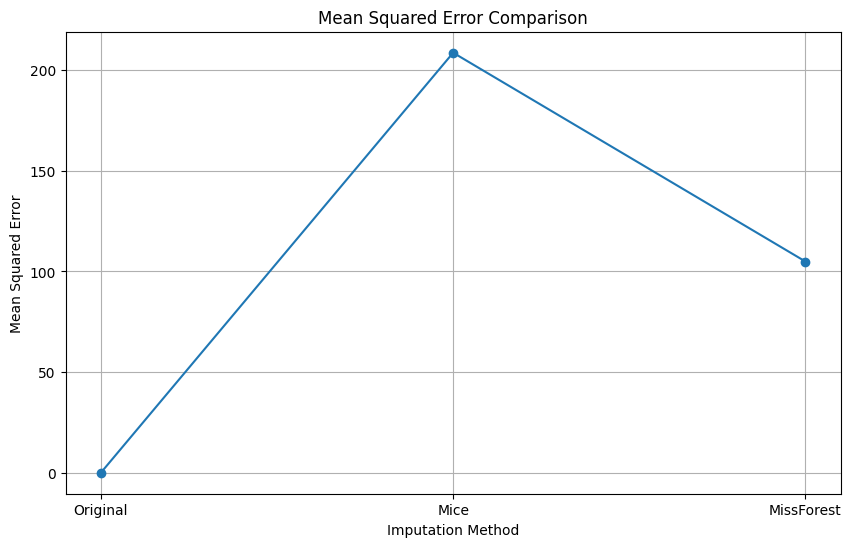

In [23]:
import matplotlib.pyplot as plt

imputed_data = {'Original': no_missing}
imputed_data['Mice'] = Mice
imputed_data['MissForest'] = MissForest

# Calculate MSE for each imputation method
mse_results = {}
for method in imputed_data.keys():
    mse_results[method] = mean_squared_error(no_missing, imputed_data[method])

# Convert MSE results to a DataFrame for easier plotting
mse_df = pd.DataFrame(list(mse_results.items()), columns=['Method', 'MSE'])

# Print MSE values
for method, mse in mse_results.items():
    print(f'MSE for {method}: {mse}')

# Visualize MSE as a line plot
plt.figure(figsize=(10, 6))
plt.plot(mse_df['Method'], mse_df['MSE'], marker='o', linestyle='-')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Imputation Method')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [29]:
pip install prettytable

+------------+-------------------+--------------------+--------------------+
| Method     | MAPE              | MAE                | MSE                |
+------------+-------------------+--------------------+--------------------+
| Original   | 0.0               | 0.0                | 0.0                |
| Mice       | 11.21669477134061 | 3.5789375987361765 | 208.71571704204206 |
| MissForest | 7.98563364300344  | 2.7707148499210112 | 104.96035011261262 |
+------------+-------------------+--------------------+--------------------+


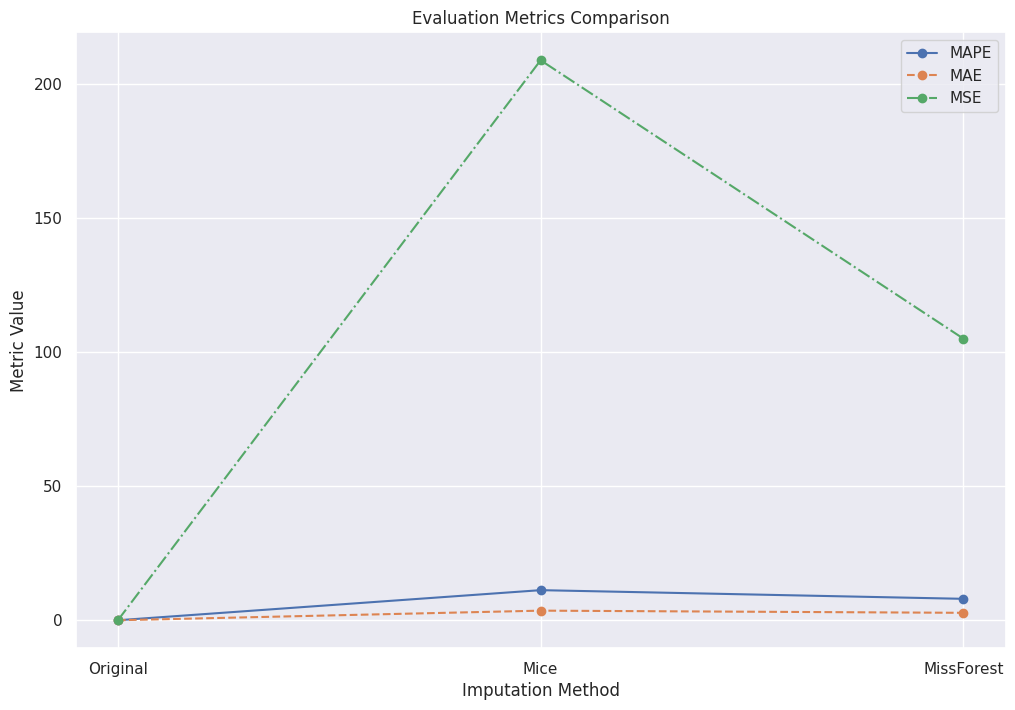

In [39]:
# Print the pretty table
print(table)

# Visualize metrics as a line plot
fig, ax = plt.subplots(figsize=(12, 8))

# Line styles for each metric
line_styles = {'MAPE': '-', 'MAE': '--', 'MSE': '-.'}

for metric, style in line_styles.items():
    ax.plot(evaluation_df['Method'], evaluation_df[metric], label=metric, marker='o', linestyle=style)

plt.title('Evaluation Metrics Comparison')
plt.xlabel('Imputation Method')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
pip install tabulate

In [24]:
df_with_missing.columns

Index(['Recent_Creatinine', 'Recent_eGFR', 'G1M2:ARB', 'G3M1:Statin',
       'G5M2:NSAIDs', 'G1M5:Diuretic', 'G1M7:Beta blocker',
       'G1M3:Dihydropyridine CCB', 'G1M6:MRA', 'G1M1:ACEI', 'G2M2:Metformin',
       'G2M3:DPP4 inhibitor', 'G2M1:SU', 'G3M3:Fibrate', 'G2M5:SGLT2i',
       'G4M1:Allopurinol', 'G1M9:Vasodilator', 'G1M8:Alpha blocker',
       'G2M6:Insulin', 'G2M4:TZD', 'G4M2:Febuxostat', 'G3M2:Ezetimibe',
       'G1M4:Non-dihydropyridine CCB', 'G5M1:Ketoanalog amino acid',
       'G2M7:GLP1-RA', 'G4M3:Uricosuric agent', 'Sex', 'Age', 'NATNL', 'BMI',
       'BSA', 'Diastolic BP', 'Systolic BP', 'D1:Hypertension',
       'D2:Diabetes mellitus', 'D3:Dyslipidemia', 'D4:SLE',
       'D5:Systemic sclerosis', 'D6:Rheumatoid arthritis', 'D7:HIV infection',
       'D8:HBV infection', 'D9:HCV infection', 'D10:Ischemic heart disease',
       'D11:Heart failure', 'D12:Thalassemia', 'D13:Kidney stone',
       'D14:Valvular heart disease', 'D15:Solid malignancy',
       'D16:Hematologic 

In [42]:
from tabulate import tabulate

# Print the table with specific formatting
print(tabulate(evaluation_df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".6f"))


╒════════════╤═══════════╤══════════╤════════════╕
│ Method     │      MAPE │      MAE │        MSE │
╞════════════╪═══════════╪══════════╪════════════╡
│ Original   │  0.000000 │ 0.000000 │   0.000000 │
├────────────┼───────────┼──────────┼────────────┤
│ Mice       │ 11.216695 │ 3.578938 │ 208.715717 │
├────────────┼───────────┼──────────┼────────────┤
│ MissForest │  7.985634 │ 2.770715 │ 104.960350 │
╘════════════╧═══════════╧══════════╧════════════╛


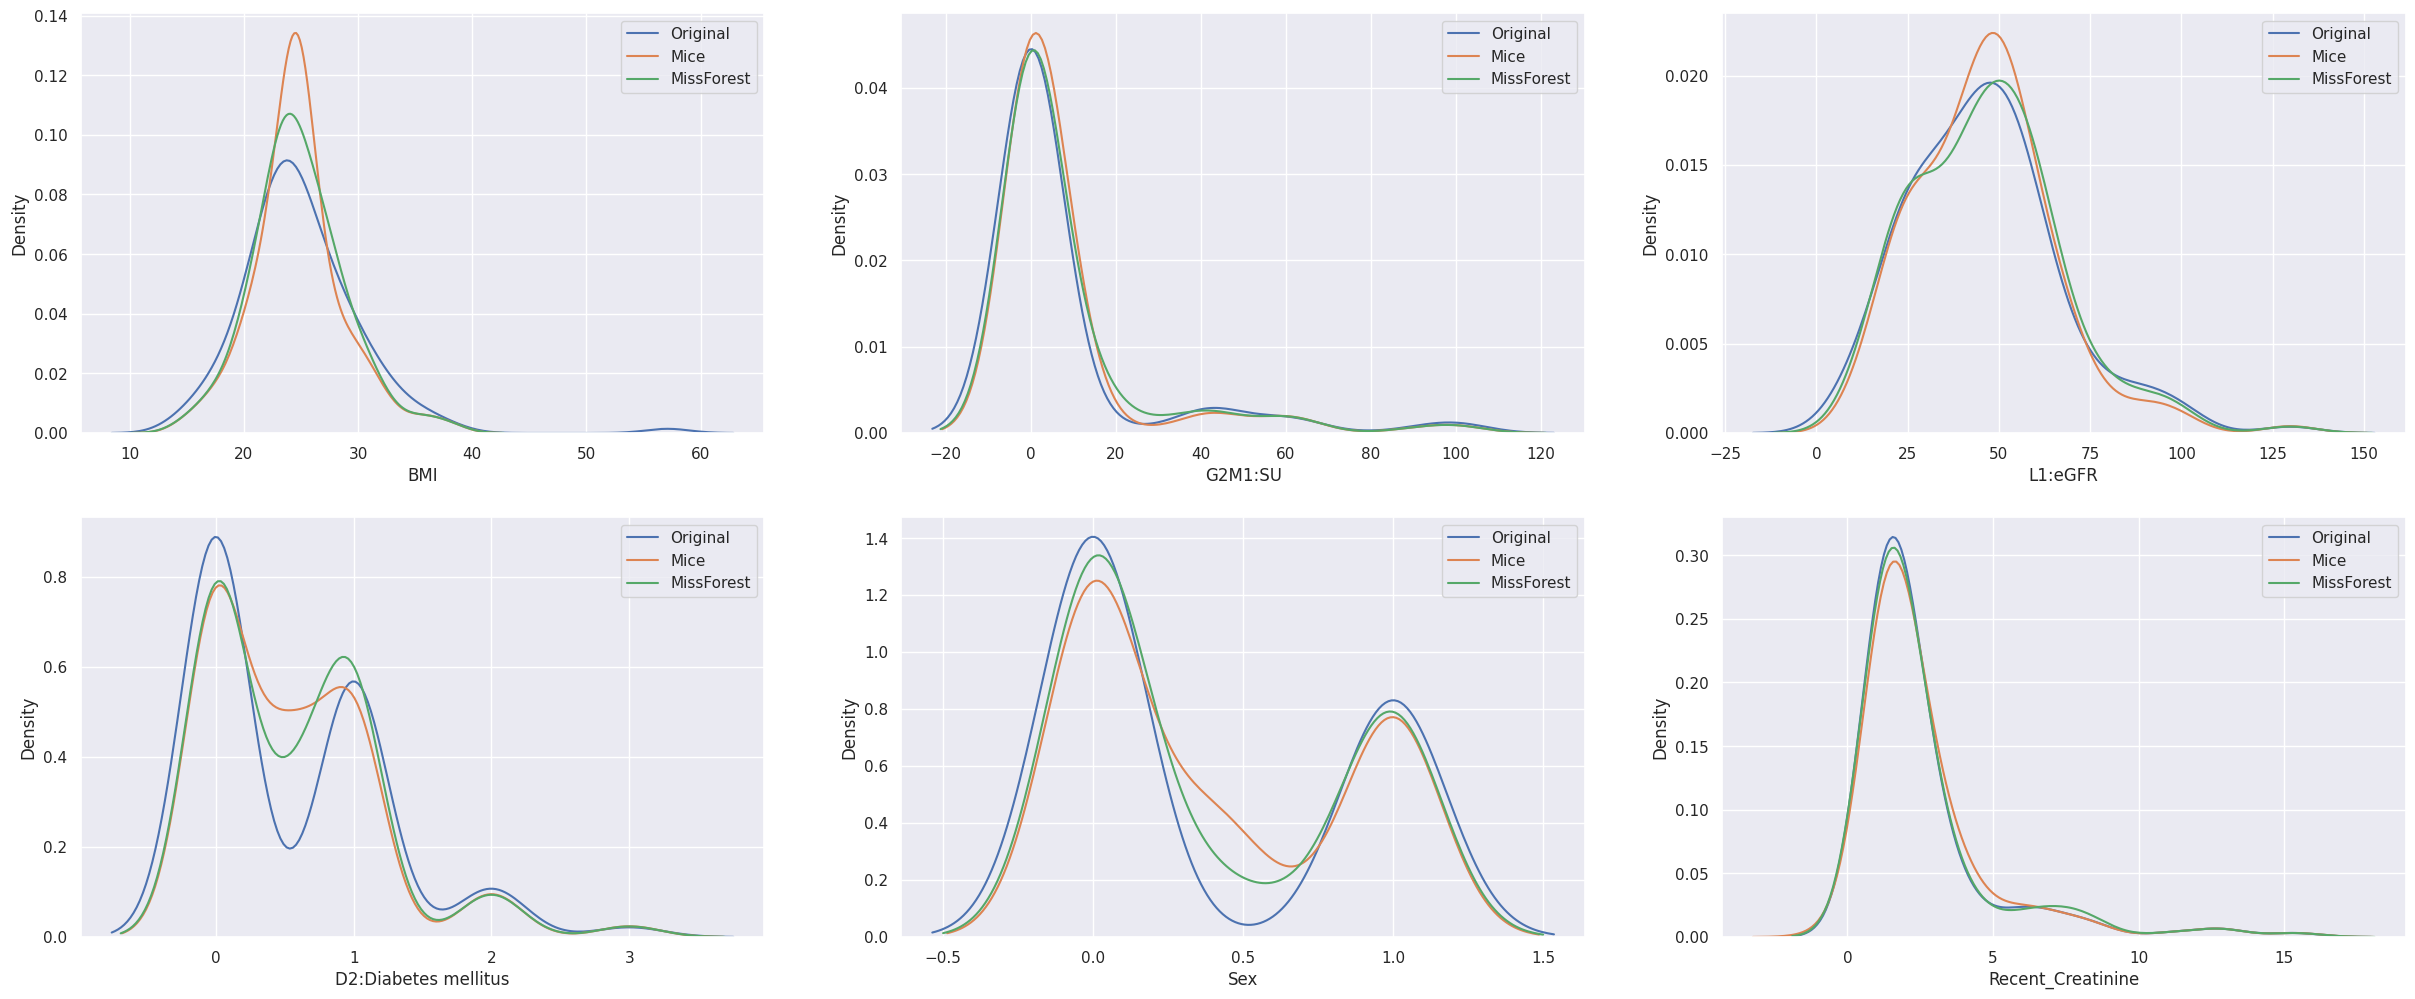

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['BMI', 'G2M1:SU', 'L1:eGFR', 'D2:Diabetes mellitus', 'Sex', 'Recent_Creatinine']

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(30, 12), nrows=2, ncols=3)

for col, i, j in zip(selected_columns, [0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]):
    sns.kdeplot(x=no_missing[col][df_with_missing.isnull().any(axis=1)], label='Original', ax=ax[i][j])
    sns.kdeplot(x=Mice[col][df_with_missing.isnull().any(axis=1)], label='Mice', ax=ax[i][j])
    sns.kdeplot(x=MissForest[col][df_with_missing.isnull().any(axis=1)], label='MissForest', ax=ax[i][j])

    ax[i][j].legend()

plt.show()


**BinaryVariable**
```
นั้นอันนี้ก็ต้องเติมด้วยค่าของคนคนนั้นอะดิ ... ยากละ
```

In [ ]:
columns_to_keep  = df_no_missing[['PatientUID', 'PatientVisitUID', 'Slopes','InPatient', 'OutPatient', 'Emergency','Recent_Date', 'VisitLocation', 'StartDTTM','EndDttm', 'LabCwhen']]
missing_for_binary = pd.concat([columns_to_keep, df_with_missing], axis=1)

In [ ]:
missing_for_binary.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,EndDttm,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
131,2291888,3434247,-2.561404,1,0,0,2561-01-03 10:23:12.210,หอผู้ป่วยสว.ชั้น9C-SV9C,2559-08-31 06:27:25.943,2559-09-02 16:12:06.647,...,8.50,238.0,110.0,7.2,NaN,113.0,NaN,40.0,747.0,NaN
364,1944785,3671352,-25.247409,0,1,0,2561-05-10 09:51:52.050,เวชปฏิบัติทั่วไป (OPD)-D03,2559-11-22 09:24:19.590,2559-11-23 05:01:01.600,...,8.40,232.0,115.0,6.9,190.0,141.0,126.0,53.0,250.0,0.0
1270,811906,4416087,-15.404570,0,1,0,2562-03-25 10:01:27.753,อายุรกรรม 9 (OPD)-D08,2560-08-21 09:06:54.857,2560-08-22 05:01:02.220,...,NaN,289.0,NaN,NaN,168.0,106.0,114.0,34.0,258.0,1.0
1562,1261164,3579795,-4.255777,1,0,0,2562-05-30 15:10:43.277,หอผู้ป่วยสว.ชั้น9B-SV9B,2559-10-20 08:51:13.367,2559-10-21 19:46:52.957,...,4.42,169.0,289.0,7.0,128.0,NaN,59.0,NaN,57.8,0.0
1940,890452,3411444,-9.459862,1,0,0,2562-08-23 09:42:24.053,หอผู้ป่วย 4ก-4AW,2559-08-23 09:05:39.400,2559-10-17 17:20:03.830,...,6.20,196.0,88.0,NaN,NaN,94.0,NaN,52.0,132.4,1.0


In [ ]:
import numpy as np
columns_with_null = missing_for_binary.columns[missing_for_binary.isnull().any()].tolist()
for col in columns_with_null:
    missing_for_binary['new' + col] = np.where(missing_for_binary[col].isnull(), 1, 0)

<ipython-input-22-b17f6ce4b54e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  missing_for_binary['new' + col] = np.where(missing_for_binary[col].isnull(), 1, 0)
<ipython-input-22-b17f6ce4b54e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  missing_for_binary['new' + col] = np.where(missing_for_binary[col].isnull(), 1, 0)
<ipython-input-22-b17f6ce4b54e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [ ]:
def detect_outliers(missing_for_binary, column):
    q1 = missing_for_binary[column].quantile(0.25)
    q3 = missing_for_binary[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = missing_for_binary[(missing_for_binary[column] < lower_bound) | (missing_for_binary[column] > upper_bound)]
    return outliers

# Check for outliers in each column
for column in columns_with_null:
    outliers = detect_outliers(missing_for_binary, column)
    if not outliers.empty:
        print(f"Column '{column}' use Median")
    else:
        print(f"Column '{column}' use Mean")

Column 'Recent_Creatinine' use Median
Column 'Recent_eGFR' use Mean
Column 'G1M2:ARB' use Median
Column 'G3M1:Statin' use Median
Column 'G5M2:NSAIDs' use Median
Column 'G1M5:Diuretic' use Median
Column 'G1M7:Beta blocker' use Median
Column 'G1M3:Dihydropyridine CCB' use Mean
Column 'G1M6:MRA' use Median
Column 'G1M1:ACEI' use Median
Column 'G2M2:Metformin' use Median
Column 'G2M3:DPP4 inhibitor' use Median
Column 'G2M1:SU' use Median
Column 'G3M3:Fibrate' use Mean
Column 'G2M5:SGLT2i' use Median
Column 'G4M1:Allopurinol' use Median
Column 'G1M9:Vasodilator' use Median
Column 'G1M8:Alpha blocker' use Median
Column 'G2M6:Insulin' use Median
Column 'G2M4:TZD' use Median
Column 'G4M2:Febuxostat' use Median
Column 'G3M2:Ezetimibe' use Median
Column 'G1M4:Non-dihydropyridine CCB' use Median
Column 'G5M1:Ketoanalog amino acid' use Median
Column 'G2M7:GLP1-RA' use Mean
Column 'G4M3:Uricosuric agent' use Mean
Column 'Sex' use Mean
Column 'Age' use Mean
Column 'NATNL' use Mean
Column 'BMI' use M

In [ ]:
missing_for_binary.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,EndDttm,...,newL14:WBC,newL15:Platelet,newL19:Blood sugar,newL20:HbA1c,newL21:Cholesterol,newL22:Triglyceride,newL23:LDL Cholesterol,newL24:HDL Cholesterol,newL28:UrineProtein/Cr ratio,newLabLocation
131,2291888,3434247,-2.561404,1,0,0,2561-01-03 10:23:12.210,หอผู้ป่วยสว.ชั้น9C-SV9C,2559-08-31 06:27:25.943,2559-09-02 16:12:06.647,...,0,0,0,0,1,0,1,0,0,1
364,1944785,3671352,-25.247409,0,1,0,2561-05-10 09:51:52.050,เวชปฏิบัติทั่วไป (OPD)-D03,2559-11-22 09:24:19.590,2559-11-23 05:01:01.600,...,0,0,0,0,0,0,0,0,0,0
1270,811906,4416087,-15.404570,0,1,0,2562-03-25 10:01:27.753,อายุรกรรม 9 (OPD)-D08,2560-08-21 09:06:54.857,2560-08-22 05:01:02.220,...,1,0,1,1,0,0,0,0,0,0
1562,1261164,3579795,-4.255777,1,0,0,2562-05-30 15:10:43.277,หอผู้ป่วยสว.ชั้น9B-SV9B,2559-10-20 08:51:13.367,2559-10-21 19:46:52.957,...,0,0,0,0,0,1,0,1,0,0
1940,890452,3411444,-9.459862,1,0,0,2562-08-23 09:42:24.053,หอผู้ป่วย 4ก-4AW,2559-08-23 09:05:39.400,2559-10-17 17:20:03.830,...,0,0,0,1,1,0,1,0,0,0
